In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [2]:
data =  "Data/data.csv"
df = pd.read_csv(data)
df.describe(include='all')

,crop,moisture,temp,pump
count,200,200.000000,200.000000,200.000000
unique,1,NaN,NaN,NaN
top,cotton,NaN,NaN,NaN
freq,200,NaN,NaN,NaN
mean,NaN,633.085000,27.750000,0.750000
std,NaN,279.077118,10.869602,0.434099
min,NaN,4.000000,10.000000,0.000000
25%,NaN,500.500000,18.000000,0.750000
50%,NaN,693.500000,28.000000,1.000000
75%,NaN,850.750000,38.000000,1.000000


In [3]:
df.info()
null_counts = df.isnull().sum()
print(null_counts)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   crop      200 non-null    object
 1   moisture  200 non-null    int64 
 2   temp      200 non-null    int64 
 3   pump      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB
crop        0
moisture    0
temp        0
pump        0
dtype: int64


In [4]:
# df_filtered = df[df['pump'] == 0]
# plt.figure(figsize=(10, 5))
# plt.scatter(df_filtered['moisture'], df_filtered['temp'])
# plt.xlabel('Moisture')
# plt.ylabel('Temperature')
# plt.title('Scatter Plot between Moisture and Temperature when Pump is 1')
# plt.show()

In [5]:
# plt.figure(figsize=(10, 5))
# plt.scatter(df['moisture'], df['temp'])
# plt.xlabel('moisture')
# plt.ylabel('pump')
# plt.title(f'Scatter Plot of pump v/s moisture')
# plt.show()


In [6]:
from mpl_toolkits.mplot3d import Axes3D

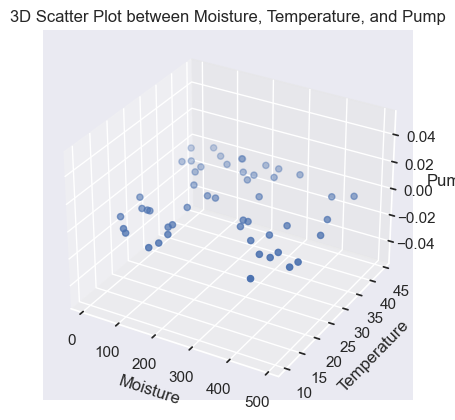

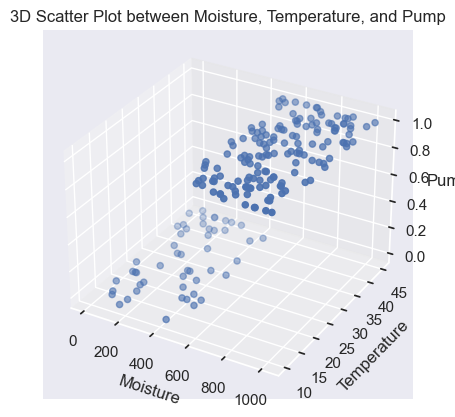

In [7]:
df_filtered = df[df['pump'] == 0]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_filtered['moisture'], df_filtered['temp'],df_filtered['pump'])

ax.set_xlabel('Moisture')
ax.set_ylabel('Temperature')
ax.set_zlabel('Pump')

plt.title('3D Scatter Plot between Moisture, Temperature, and Pump')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['moisture'], df['temp'],df['pump'])

ax.set_xlabel('Moisture')
ax.set_ylabel('Temperature')
ax.set_zlabel('Pump')

plt.title('3D Scatter Plot between Moisture, Temperature, and Pump')
plt.show()

In [8]:
df_wo_cropType = df.drop(columns=['crop'])

grouped = df_wo_cropType.groupby('pump').mean()
print(grouped)

        moisture       temp
pump                       
0     221.100000  28.120000
1     770.413333  27.626667


In [9]:
df['pump'] = df['pump'].replace({1: 0, 0: 1})

In [10]:
from sklearn.model_selection import train_test_split

X = df[['moisture','temp']]
y = df[['pump']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_classifier = RandomForestClassifier(n_estimators=100)

rf_classifier.fit(rescaledX_train, y_train)
y_pred_rf = rf_classifier.predict(rescaledX_test)

print(classification_report(y_pred_rf, y_test)) 
# print("Accuracy of Random Forest classifier: ", accuracy_score(y_test,y_pred_rf))
# print("Precision of Random Forest classifier: ", precision_score(y_test, y_pred_rf))
# print("Recall of Random Forest classifier: ", recall_score(y_test, y_pred_rf))
# print("F1 Score of Random Forest classifier: ", f1_score(y_test, y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        46
           1       0.93      1.00      0.97        14

    accuracy                           0.98        60
   macro avg       0.97      0.99      0.98        60
weighted avg       0.98      0.98      0.98        60

[[45  0]
 [ 1 14]]


C:\Users\Dev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [48]:
from sklearn.model_selection import GridSearchCV
param_grid_rf = { 
    'n_estimators': [25,50,100,150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3,6,9], 
    'max_leaf_nodes': [3,6,9], 
} 

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid=param_grid_rf) 
grid_search_rf.fit(X_train, y_train) 

C:\Users\Dev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Dev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Dev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]})

In [42]:
grid_search_rf.best_params_

{'max_depth': 3,
 'max_features': 'sqrt',
 'max_leaf_nodes': 3,
 'n_estimators': 25}

In [49]:
rf_classifier_best = RandomForestClassifier(**grid_search_rf.best_params_)

rf_classifier_best.fit(rescaledX_train, y_train)
y_pred_rf_best = rf_classifier_best.predict(rescaledX_test)

print(classification_report(y_pred_rf_best, y_test)) 
print(confusion_matrix(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        46
           1       0.93      1.00      0.97        14

    accuracy                           0.98        60
   macro avg       0.97      0.99      0.98        60
weighted avg       0.98      0.98      0.98        60

[[45  0]
 [ 1 14]]


C:\Users\Dev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

logreg = LogisticRegression()
logreg.fit(rescaledX_train,y_train)

y_pred_logreg = logreg.predict(rescaledX_test)

print("Accuracy of logistic regression classifier: ", accuracy_score(y_test,y_pred_logreg))
print("Precision of logistic regression classifier: ", precision_score(y_test, y_pred_logreg))
print("Recall of logistic regression classifier: ", recall_score(y_test, y_pred_logreg))
print("F1 Score of logistic regression classifier: ", f1_score(y_test, y_pred_logreg))
print(confusion_matrix(y_test,y_pred_logreg))

Accuracy of logistic regression classifier:  0.95
Precision of logistic regression classifier:  1.0
Recall of logistic regression classifier:  0.8
F1 Score of logistic regression classifier:  0.888888888888889
[[45  0]
 [ 3 12]]


C:\Users\Dev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
param_grid_logreg = [
    {'penalty':['l1','l2','elasticnet','none'],
    'C' : np.logspace(-4,4,20),
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter'  : [100,1000,2500,5000]
}
]
grid_search_logreg = GridSearchCV(LogisticRegression(),param_grid = param_grid_logreg)
grid_search_logreg.fit(X_train, y_train) 

C:\Users\Dev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

GridSearchCV(estimator=LogisticRegression(),
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}])

In [34]:
grid_search_logreg.best_estimator_

LogisticRegression(C=0.0006951927961775605)

In [37]:
logreg_best = LogisticRegression(**grid_search_logreg.best_params_)
logreg_best.fit(rescaledX_train,y_train)

y_pred_logreg_best = logreg.predict(rescaledX_test)

print("Accuracy of logistic regression classifier: ", accuracy_score(y_test,y_pred_logreg))
print("Precision of logistic regression classifier: ", precision_score(y_test, y_pred_logreg))
print("Recall of logistic regression classifier: ", recall_score(y_test, y_pred_logreg))
print("F1 Score of logistic regression classifier: ", f1_score(y_test, y_pred_logreg))
print(confusion_matrix(y_test,y_pred_logreg))
print(classification_report(y_pred_logreg_best,y_test))

Accuracy of logistic regression classifier:  0.95
Precision of logistic regression classifier:  1.0
Recall of logistic regression classifier:  0.8
F1 Score of logistic regression classifier:  0.888888888888889
[[45  0]
 [ 3 12]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        48
           1       0.80      1.00      0.89        12

    accuracy                           0.95        60
   macro avg       0.90      0.97      0.93        60
weighted avg       0.96      0.95      0.95        60



C:\Users\Dev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
from sklearn import svm

svm = svm.SVC(kernel = 'poly')
svm.fit(rescaledX_train,y_train)

y_pred_svm = svm.predict(rescaledX_test)

print("Accuracy of SVM: ", accuracy_score(y_test,y_pred_svm))
print("Precision of SVM: ", precision_score(y_test, y_pred_svm))
print("Recall of SVM: ", recall_score(y_test, y_pred_svm))
print("F1 Score of SVM: ", f1_score(y_test, y_pred_svm))
print(confusion_matrix(y_test,y_pred_svm))
print(classification_report(y_pred_svm,y_test))

Accuracy of SVM:  0.9833333333333333
Precision of SVM:  0.9375
Recall of SVM:  1.0
F1 Score of SVM:  0.967741935483871
[[44  1]
 [ 0 15]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       1.00      0.94      0.97        16

    accuracy                           0.98        60
   macro avg       0.99      0.97      0.98        60
weighted avg       0.98      0.98      0.98        60



C:\Users\Dev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
